In [1]:
import numpy as np
import pandas as pd

In [2]:
match=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Python ml\matches.csv")
delivery=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Python ml\deliveries.csv")

In [3]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
match.shape

(1095, 20)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_score_df=total_score_df[total_score_df['inning']==1] 

In [8]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [9]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [10]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [11]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [12]:
teams=['Sunrisers Hyderabad',
       'Royal Challengers Bengaluru',
       'Mumbai Indians',
       'Punjab Kings',
       'Rajasthan Royals',
       'Lucknow Super Giants',
       'Kolkata Knight Riders',
       'Gujarat Titans',
       'Chennai Super Kings',
       'Delhi Capitals']

In [13]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1']=match_df['team1'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
match_df['team2']=match_df['team2'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

match_df['team1']=match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2']=match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

match_df['team1']=match_df['team1'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['team2']=match_df['team2'].str.replace('Gujarat Lions','Gujarat Titans')

In [14]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [15]:
match_df.shape

(1006, 22)

In [16]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [17]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [18]:
delivery_df=match_df.merge(delivery,on='match_id')

In [19]:
delivery_df=delivery_df[delivery_df['inning']==1]

In [20]:
delivery_df.shape

(124154, 20)

In [21]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239975,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,SP Narine,PJ Cummins,0,0,0,NaN,1,JD Unadkat,lbw,NaN
239976,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,SP Narine,PJ Cummins,0,0,0,NaN,0,NaN,NaN,NaN
239977,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN
239978,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN


In [22]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [23]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
0,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,...,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,1
1,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,...,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1
2,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,...,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,2
3,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,...,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2
4,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,...,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239975,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,...,PJ Cummins,0,0,0,NaN,1,JD Unadkat,lbw,NaN,113
239976,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,...,PJ Cummins,0,0,0,NaN,0,NaN,NaN,NaN,113
239977,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,...,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN,113
239978,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,...,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN,113


In [24]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [25]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
0,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,...,0,1,1,legbyes,0,NaN,NaN,NaN,1,221
1,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,...,0,0,0,NaN,0,NaN,NaN,NaN,1,221
2,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,...,0,1,1,wides,0,NaN,NaN,NaN,2,220
3,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,...,0,0,0,NaN,0,NaN,NaN,NaN,2,220
4,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,...,0,0,0,NaN,0,NaN,NaN,NaN,2,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239975,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,...,0,0,0,NaN,1,JD Unadkat,lbw,NaN,113,0
239976,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,...,0,0,0,NaN,0,NaN,NaN,NaN,113,0
239977,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,...,0,0,0,NaN,0,NaN,NaN,NaN,113,0
239978,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,...,0,0,0,NaN,0,NaN,NaN,NaN,113,0


In [26]:
delivery_df['balls_left']=126-((delivery_df['over']+1)*6+delivery_df['ball'])

In [27]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
0,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,...,1,1,legbyes,0,NaN,NaN,NaN,1,221,119
1,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,...,0,0,NaN,0,NaN,NaN,NaN,1,221,118
2,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,...,1,1,wides,0,NaN,NaN,NaN,2,220,117
3,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,...,0,0,NaN,0,NaN,NaN,NaN,2,220,116
4,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,...,0,0,NaN,0,NaN,NaN,NaN,2,220,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239975,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,...,0,0,NaN,1,JD Unadkat,lbw,NaN,113,0,13
239976,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,...,0,0,NaN,0,NaN,NaN,NaN,113,0,12
239977,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,...,0,0,NaN,0,NaN,NaN,NaN,113,0,11
239978,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,...,0,0,NaN,0,NaN,NaN,NaN,113,0,10


In [28]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')
wickets=delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets']=10-wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
0,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,...,1,legbyes,0,0,NaN,NaN,1,221,119,10
1,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,...,0,NaN,0,0,NaN,NaN,1,221,118,10
2,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,...,1,wides,0,0,NaN,NaN,2,220,117,10
3,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,...,0,NaN,0,0,NaN,NaN,2,220,116,10
4,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,...,0,NaN,0,0,NaN,NaN,2,220,115,10


In [29]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
239975,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,...,0,NaN,1,1,lbw,NaN,113,0,13,1
239976,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,...,0,NaN,0,0,NaN,NaN,113,0,12,1
239977,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,...,0,NaN,0,0,NaN,NaN,113,0,11,1
239978,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,...,0,NaN,0,0,NaN,NaN,113,0,10,1
239979,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,3,PJ Cummins,...,0,NaN,1,1,caught,MA Starc,113,0,9,0


In [30]:
# crr=runs/overs
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

In [31]:
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']

In [32]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
0,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,...,0,0,NaN,NaN,1,221,119,10,6.000000,11.142857
1,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,...,0,0,NaN,NaN,1,221,118,10,3.000000,11.237288
2,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,...,0,0,NaN,NaN,2,220,117,10,4.000000,11.282051
3,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,...,0,0,NaN,NaN,2,220,116,10,3.000000,11.379310
4,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,...,0,0,NaN,NaN,2,220,115,10,2.400000,11.478261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239975,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,...,1,1,lbw,NaN,113,0,13,1,6.336449,0.000000
239976,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,...,0,0,NaN,NaN,113,0,12,1,6.277778,0.000000
239977,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,...,0,0,NaN,NaN,113,0,11,1,6.220183,0.000000
239978,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,...,0,0,NaN,NaN,113,0,10,1,6.163636,0.000000


In [33]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [34]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [35]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
0,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,...,0,NaN,NaN,1,221,119,10,6.000000,11.142857,1
1,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,...,0,NaN,NaN,1,221,118,10,3.000000,11.237288,1
2,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,...,0,NaN,NaN,2,220,117,10,4.000000,11.282051,1
3,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,...,0,NaN,NaN,2,220,116,10,3.000000,11.379310,1
4,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,...,0,NaN,NaN,2,220,115,10,2.400000,11.478261,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239975,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,...,1,lbw,NaN,113,0,13,1,6.336449,0.000000,0
239976,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,...,0,NaN,NaN,113,0,12,1,6.277778,0.000000,0
239977,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,...,0,NaN,NaN,113,0,11,1,6.220183,0.000000,0
239978,1426312,Chennai,Kolkata Knight Riders,113,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,...,0,NaN,NaN,113,0,10,1,6.163636,0.000000,0


In [36]:
delivery_df['batting_team']=delivery_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery_df['bowling_team']=delivery_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

delivery_df['batting_team']=delivery_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery_df['bowling_team']=delivery_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

delivery_df['batting_team']=delivery_df['batting_team'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
delivery_df['bowling_team']=delivery_df['bowling_team'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

delivery_df['batting_team']=delivery_df['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
delivery_df['bowling_team']=delivery_df['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')

delivery_df['batting_team']=delivery_df['batting_team'].str.replace('Gujarat Lions','Gujarat Titans')
delivery_df['bowling_team']=delivery_df['bowling_team'].str.replace('Gujarat Lions','Gujarat Titans')

In [37]:
delivery_df=delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df=delivery_df[delivery_df['bowling_team'].isin(teams)]

In [38]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [39]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
0,Kolkata Knight Riders,Royal Challengers Bengaluru,Bangalore,221,119,10,222,6.000000,11.142857,1
1,Kolkata Knight Riders,Royal Challengers Bengaluru,Bangalore,221,118,10,222,3.000000,11.237288,1
2,Kolkata Knight Riders,Royal Challengers Bengaluru,Bangalore,220,117,10,222,4.000000,11.282051,1
3,Kolkata Knight Riders,Royal Challengers Bengaluru,Bangalore,220,116,10,222,3.000000,11.379310,1
4,Kolkata Knight Riders,Royal Challengers Bengaluru,Bangalore,220,115,10,222,2.400000,11.478261,1
...,...,...,...,...,...,...,...,...,...,...
239975,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,0,13,1,113,6.336449,0.000000,0
239976,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,0,12,1,113,6.277778,0.000000,0
239977,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,0,11,1,113,6.220183,0.000000,0
239978,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,0,10,1,113,6.163636,0.000000,0


In [40]:
final_df=final_df.sample(final_df.shape[0])

In [41]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
136252,Royal Challengers Bengaluru,Kolkata Knight Riders,Bengaluru,148,101,10,175,8.526316,8.792079,0


In [42]:
final_df=final_df[final_df['balls_left']!=0]

In [43]:
final_df.dropna(inplace=True)

In [44]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
11169,Rajasthan Royals,Chennai Super Kings,Chennai,83,52,9,211,11.294118,9.576923,1
114714,Punjab Kings,Delhi Capitals,Chandigarh,0,-1,5,181,8.975207,-0.000000,1
116983,Kolkata Knight Riders,Royal Challengers Bengaluru,Kolkata,169,108,10,183,7.000000,9.388889,0
115302,Royal Challengers Bengaluru,Punjab Kings,Chandigarh,165,112,10,175,7.500000,8.839286,1
130888,Rajasthan Royals,Delhi Capitals,Jaipur,9,18,6,153,8.470588,3.000000,1
...,...,...,...,...,...,...,...,...,...,...
14110,Kolkata Knight Riders,Sunrisers Hyderabad,Cape Town,76,72,7,101,3.125000,6.333333,0
215643,Delhi Capitals,Gujarat Titans,Ahmedabad,115,106,8,130,6.428571,6.509434,1
184857,Rajasthan Royals,Mumbai Indians,Sharjah,49,82,7,90,6.473684,3.585366,0
25026,Chennai Super Kings,Kolkata Knight Riders,Centurion,21,10,7,188,9.109091,12.600000,0


In [47]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [48]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
230373,Kolkata Knight Riders,Rajasthan Royals,Kolkata,96,44,8,223,10.026316,13.090909
192839,Gujarat Titans,Rajasthan Royals,Mumbai,108,51,7,192,7.304348,12.705882
21252,Sunrisers Hyderabad,Punjab Kings,Kimberley,137,101,10,168,9.789474,8.138614
214949,Chennai Super Kings,Punjab Kings,Chennai,86,46,9,200,9.243243,11.217391
193286,Lucknow Super Giants,Mumbai Indians,Mumbai,142,83,9,199,9.243243,10.265060
...,...,...,...,...,...,...,...,...,...
75,Kolkata Knight Riders,Royal Challengers Bengaluru,Bangalore,106,46,8,222,9.405405,13.826087
4574,Chennai Super Kings,Delhi Capitals,Chennai,87,60,8,169,8.200000,8.700000
207527,Rajasthan Royals,Delhi Capitals,Guwahati,129,82,10,199,11.052632,9.439024
85934,Delhi Capitals,Rajasthan Royals,Delhi,119,97,10,152,8.608696,7.360825


In [49]:
X_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,81846.000000,81846.000000,81846.000000,81846.000000,81846.000000,81846.000000
mean,89.561347,60.103805,7.591183,167.354092,7.480790,9.535560
std,51.894022,34.423573,2.016157,31.578791,2.280119,3.707798
min,0.000000,-4.000000,0.000000,62.000000,0.000000,-36.000000
25%,47.000000,30.000000,6.000000,147.000000,6.257373,7.647059
50%,88.000000,60.000000,8.000000,167.000000,7.531915,9.130435
75%,129.000000,90.000000,9.000000,187.000000,8.718750,10.909091
max,287.000000,119.000000,10.000000,287.000000,36.000000,96.000000


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf=ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
                      ,remainder='passthrough')

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [52]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [53]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [54]:
y_pred=pipe.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, classification_report
accuracy1=accuracy_score(y_test,y_pred)
accuracy1

0.7253264154170705

In [56]:
pipe.predict_proba(X_test)[0]

array([0.56680756, 0.43319244])

In [57]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [58]:
temp_df,target=match_progression(delivery_df,1136561,pipe)
temp_df

Target- 165


,end_of_over,runs_after_over,wickets_in_over,lose,win
129592,1,5,0,65.1,34.9
129598,2,2,0,66.0,34.0
129604,3,5,1,66.3,33.7
129610,4,8,1,66.2,33.8
129617,5,6,0,66.3,33.7
129623,6,13,0,65.7,34.3
129629,7,4,0,66.2,33.8
129635,8,9,0,66.1,33.9
129641,9,10,0,65.9,34.1
129647,10,3,0,66.5,33.5


Text(0.5, 1.0, 'Target-165')

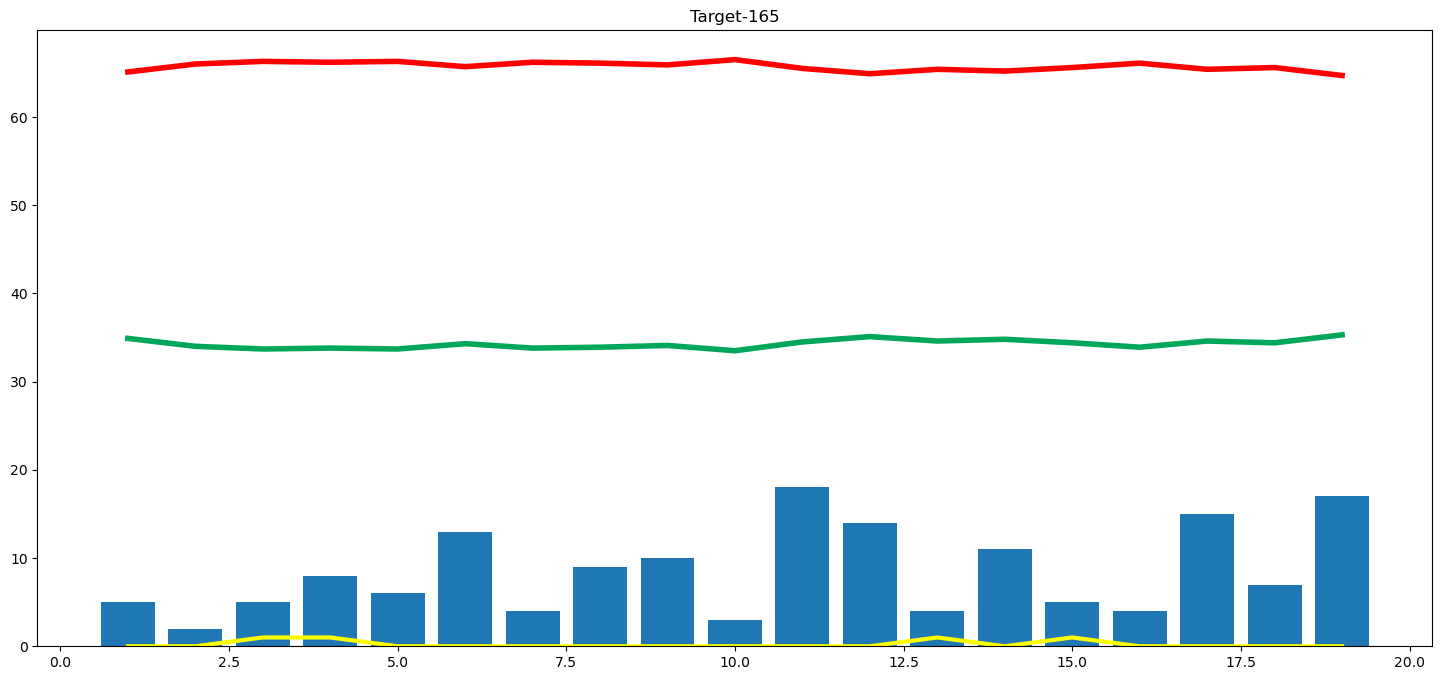

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [60]:
from sklearn.ensemble import RandomForestClassifier
pipe2=Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [61]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [62]:
y_pred2=pipe2.predict(X_test)

In [63]:
accuracy2=accuracy_score(y_test,y_pred2)
accuracy2

0.9983465419921318

In [64]:
pipe2.predict_proba(X_test)[0]

array([0.94, 0.06])

In [65]:
temp_df2,target2=match_progression(delivery_df,1136561,pipe2)
temp_df2

Target- 165


,end_of_over,runs_after_over,wickets_in_over,lose,win
129592,1,5,0,86.0,14.0
129598,2,2,0,89.0,11.0
129604,3,5,1,82.0,18.0
129610,4,8,1,85.0,15.0
129617,5,6,0,97.0,3.0
129623,6,13,0,92.0,8.0
129629,7,4,0,96.0,4.0
129635,8,9,0,96.0,4.0
129641,9,10,0,95.0,5.0
129647,10,3,0,46.0,54.0


Text(0.5, 1.0, 'Target-165')

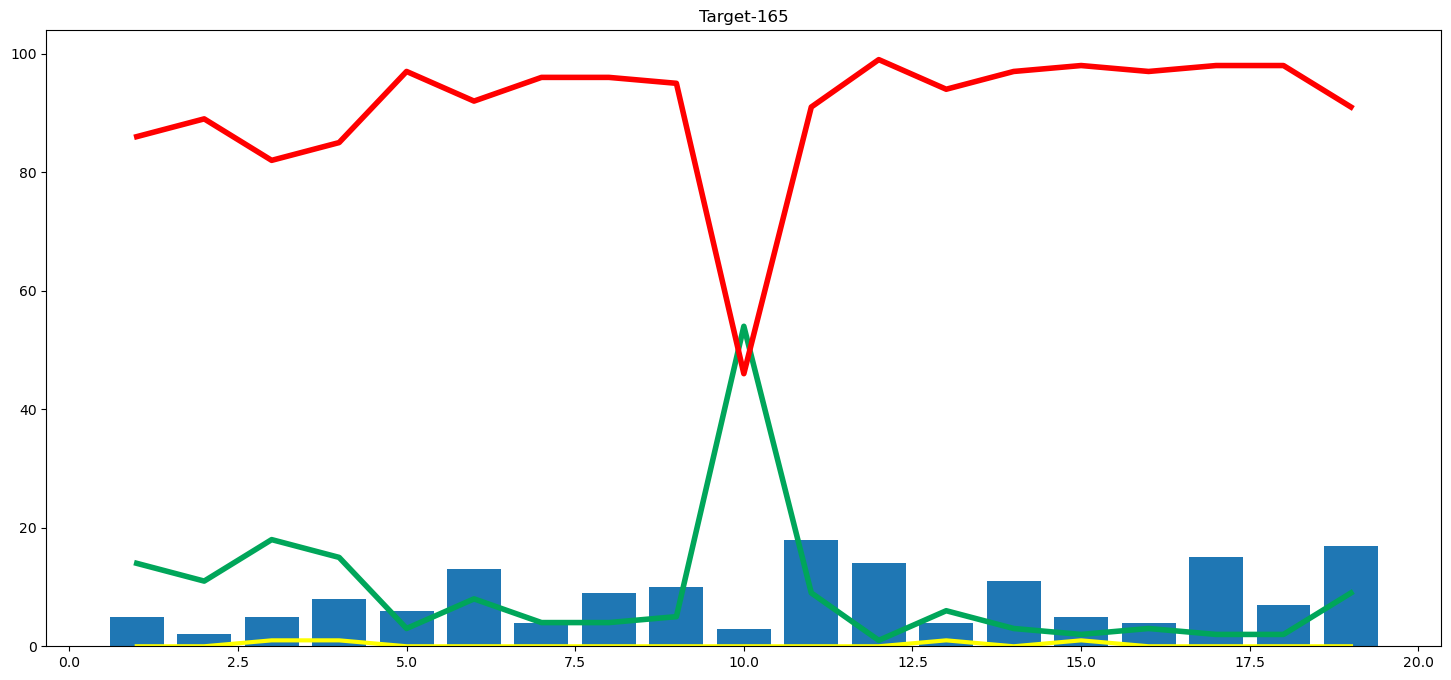

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df2['end_of_over'],temp_df2['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df2['end_of_over'],temp_df2['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df2['end_of_over'],temp_df2['lose'],color='red',linewidth=4)
plt.bar(temp_df2['end_of_over'],temp_df2['runs_after_over'])
plt.title('Target-' + str(target2))

In [67]:
from sklearn.tree import DecisionTreeClassifier
pipe3=Pipeline(steps=[
    ('step1',trf),
    ('step2',DecisionTreeClassifier())
])

In [68]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', DecisionTreeClassifier())])

In [69]:
y_pred3=pipe3.predict(X_test)

In [70]:
accuracy3=accuracy_score(y_test,y_pred3)
accuracy3

0.9986886367523804

In [71]:
pipe3.predict_proba(X_test)[0]

array([1., 0.])

In [72]:
temp_df3,target3=match_progression(delivery_df,1136561,pipe3)
temp_df3

Target- 165


,end_of_over,runs_after_over,wickets_in_over,lose,win
129592,1,5,0,100.0,0.0
129598,2,2,0,100.0,0.0
129604,3,5,1,100.0,0.0
129610,4,8,1,100.0,0.0
129617,5,6,0,100.0,0.0
129623,6,13,0,100.0,0.0
129629,7,4,0,100.0,0.0
129635,8,9,0,100.0,0.0
129641,9,10,0,100.0,0.0
129647,10,3,0,100.0,0.0


Text(0.5, 1.0, 'Target-165')

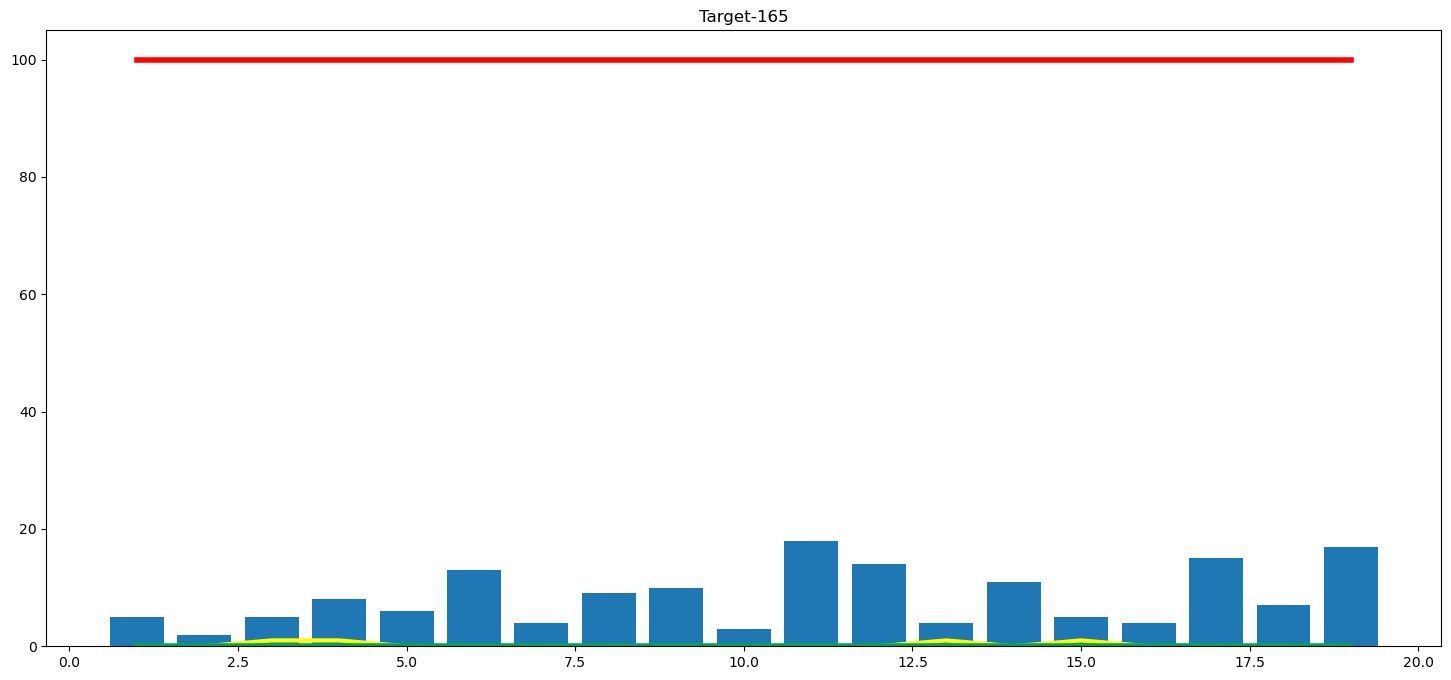

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df3['end_of_over'],temp_df3['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df3['end_of_over'],temp_df3['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df3['end_of_over'],temp_df3['lose'],color='red',linewidth=4)
plt.bar(temp_df3['end_of_over'],temp_df3['runs_after_over'])
plt.title('Target-' + str(target3))

In [75]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))